In [1]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
SEED = 1311 #глобальная переменная

### 1.Моделирование несколько выборок с одинаковым мат. ожиданием

In [2]:
n = 300 #размер
norm = ss.norm.rvs(loc=2, scale=1.5, size=n, random_state=SEED)#loc - отвечает за смещение кривой вдоль Ох,scale - отвечает за смещение экстремума вдоль Оу.                                                                
expon = ss.expon.rvs(scale=2, size=n, random_state=SEED)#scale - чтобы сдвинуть и/или масштабировать распределение. f(x) = exp(-x), x>=0 - функция плотности вероятности
uniform = ss.uniform.rvs(loc=3.5,scale=8, size=n,random_state=SEED)#loc - определяет начало отрезка,на котором случайная ведичина равномерно распределена,scale - определяет длину отрезка, на котором задана случайная величина.
lognorm = ss.lognorm.rvs(s=1, scale=np.exp(np.log(2) - 0.5), size=n, random_state=SEED)
uniform

array([ 5.01197918,  6.01138877,  8.65889565,  9.30435223,  9.0896822 ,
        5.16473764,  3.86482627,  7.81231079,  6.39111644,  4.17638054,
        5.2844753 ,  3.98639213,  5.93542056,  6.05501562,  6.29972601,
        6.47148542,  5.43485919,  5.26299598,  6.12892519, 10.560424  ,
        9.15075541,  5.53130728,  4.38235403,  7.64635946, 11.07218262,
        6.40975787,  4.63674788,  5.62056942,  6.62891488,  8.34804289,
       10.55809237,  9.75884484, 10.44677762,  6.3075754 ,  4.81939369,
        8.2816093 ,  4.74771511,  9.87313822,  9.22858248,  7.71713895,
        9.70405608,  3.51366375,  9.29992027,  7.8725914 ,  4.46427452,
        9.85649834,  4.25035421,  6.34676504,  7.90339778, 10.58487507,
        9.27792287,  8.72767666,  6.65676371,  5.0915669 ,  7.71275699,
        7.59824701,  6.38006363,  4.63805045,  3.97458152,  3.8216027 ,
        3.87839631,  3.67735804,  4.64780298,  3.9268272 , 10.26997189,
        8.88600825,  5.00262558, 10.22826921,  7.07940357, 10.88

In [3]:
data = pd.DataFrame({'norm': norm, 'expon': expon, 'ravn': uniform, 'lognorm': lognorm})
data

,norm,expon,ravn,lognorm
0,1.126221,0.418968,5.011979,0.677482
1,0.539592,0.753533,6.011389,0.458196
2,3.993007,2.070497,8.658896,4.580548
3,3.280064,2.585929,9.304352,2.847734
4,0.537486,2.399366,9.089682,0.457553
...,...,...,...,...
295,2.819910,0.440454,5.081306,2.095420
296,1.763148,5.905503,11.082433,1.035875
297,1.354598,3.862128,10.340049,0.788896
298,0.735335,0.737460,5.967103,0.522065


### 2.Подсчёт выборочных характеристик

In [4]:
stats = data.apply([np.min, np.max, np.mean, np.median])

#вычисляем квантили уровня 0.25, уровня 0.75
stats.loc['Q1'] = data.apply(np.quantile, q=0.25)
stats.loc['Q3'] = data.apply(np.quantile, q=0.75)

#дисперсия
stats.loc['V'] = data.apply(ss.variation)

#исправленная выборочная дисперсия 
stats.loc['new var'] = data.apply(np.var, ddof=1)

#выборочное исправленное стандартное отклонение
stats.loc['std (unb)'] = data.apply(np.std, ddof=1)

#коэффициент вариации
stats.loc['V'] = data.apply(ss.variation)

#коэффициент ассиметрии
stats.loc['skew'] = data.apply(ss.skew)

#эксцесс
stats.loc['kurtosis'] = data.apply(ss.kurtosis)

stats


,norm,expon,ravn,lognorm
amin,-1.167110,0.002037,3.508143,0.146862
amax,6.587717,12.066782,11.480821,25.832283
mean,2.135125,1.952520,7.463859,2.328768
median,2.106695,1.494624,7.710895,1.302527
Q1,0.982680,0.572387,5.491061,0.615659
Q3,3.126959,2.611617,9.332373,2.571412
V,0.718166,0.994094,0.307826,1.413638
new var,2.359101,3.780038,5.296484,10.873744
std (unb),1.535936,1.944232,2.301409,3.297536
skew,0.292616,1.961257,-0.032814,3.912235


### 3.Гистограммы,boxplot, эмпирич.ф.р. и плотность

<AxesSubplot: >

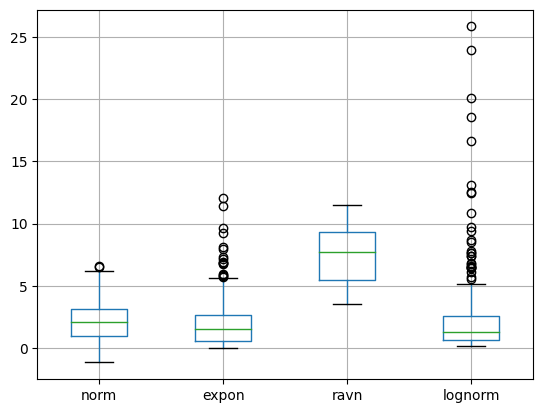

In [5]:
data.boxplot()

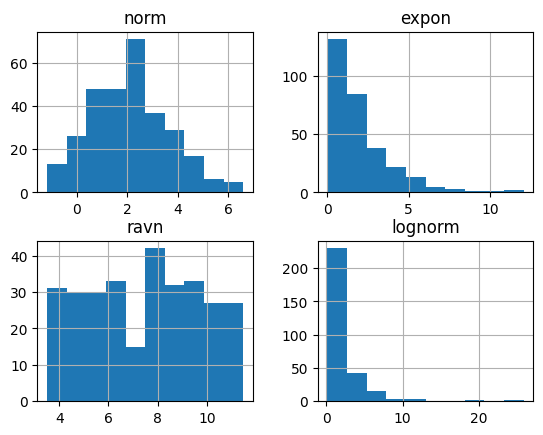

In [6]:
data.hist()
plt.show()

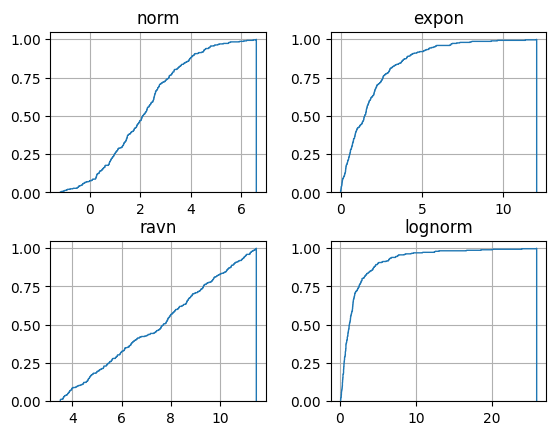

In [7]:
data.hist(bins=1000, cumulative=True, density=True, histtype='step')
plt.show()

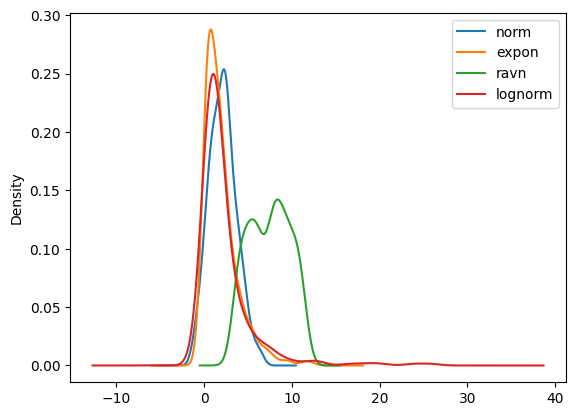

In [8]:
data.plot(kind='kde')
plt.show()

4  Получаем две выборки объемом 180 и 160 значений из нормального распределённия с разными значениями параметров. По объединенной выборке, моделирующей выборку из конечной смеси двух распределений,
 1. – найдём выборочные характеристики из п.п. 1

In [9]:
#4
norm1 = ss.norm.rvs(loc=4, scale=1.5, size=180, random_state=SEED)
norm2 = ss.norm.rvs(loc=5, scale=2, size=160, random_state=SEED)
all_norm = np.array([*norm1,*norm2],dtype=float)
data1 = pd.DataFrame({'norm': norm})

stats1 = data1.apply([np.min, np.max, np.mean, np.median])

#вычисляем квантили уровня 0.25, уровня 0.75
stats1.loc['Q1'] = data1.apply(np.quantile, q=0.25)
stats1.loc['Q3'] = data1.apply(np.quantile, q=0.75)

#дисперсия
stats1.loc['V'] = data1.apply(ss.variation)

#исправленная выборочная дисперсия 
stats1.loc['new var'] = data1.apply(np.var, ddof=1)

#выборочное исправленное стандартное отклонение
stats1.loc['std (unb)'] = data1.apply(np.std, ddof=1)

#коэффициент вариации
stats1.loc['V'] = data1.apply(ss.variation)

#коэффициент ассиметрии
stats1.loc['skew'] = data1.apply(ss.skew)

#эксцесс
stats1.loc['kurtosis'] = data1.apply(ss.kurtosis)

stats1

,norm
amin,-1.167110
amax,6.587717
mean,2.135125
median,2.106695
Q1,0.982680
Q3,3.126959
V,0.718166
new var,2.359101
std (unb),1.535936
skew,0.292616


2. – построем гистограмму, полигон частот и эмпирическую функцию распределения.

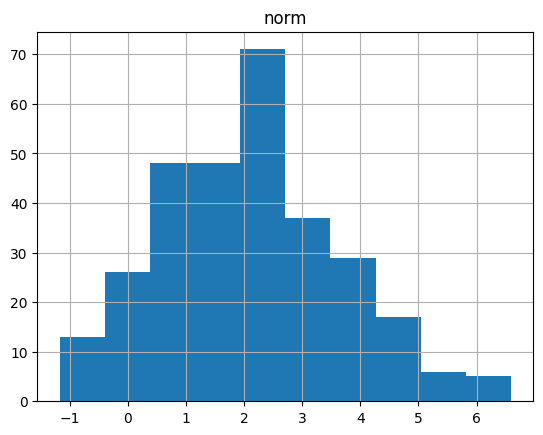

In [10]:
data1.hist()
plt.show()

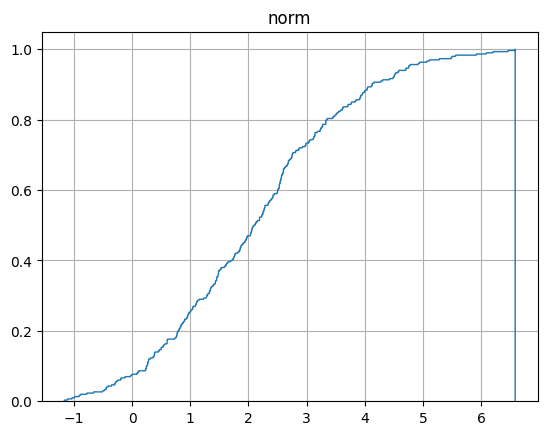

In [11]:
data1.hist(bins=1000, cumulative=True, density=True, histtype='step')
plt.show()

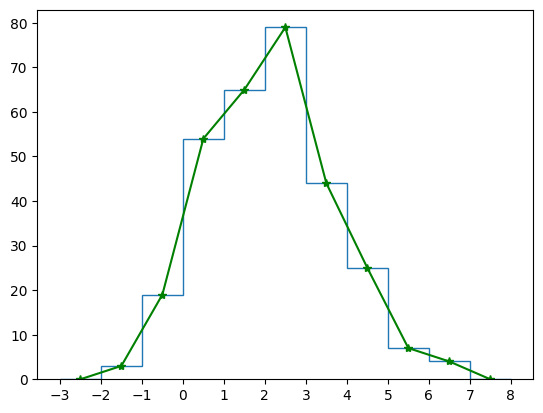

In [12]:

intervals=[-3,-2,-1,0,1,2,3,4,5,6,7,8]                     #Возьмём такие интервалы для вычисления средних точек
plt.xticks(intervals)                                      #Метод, для того чтобы на оси Ох были показаны все интервалы
y,edges,_=plt.hist(data1,bins=intervals,histtype='step')
midpoints=0.5*(edges[1:]+edges[:-1])                       #Вычисление средних точек(edges - рёбра)
plt.plot(midpoints,y,'g-*')

Сравним гистограмму с плотностью.

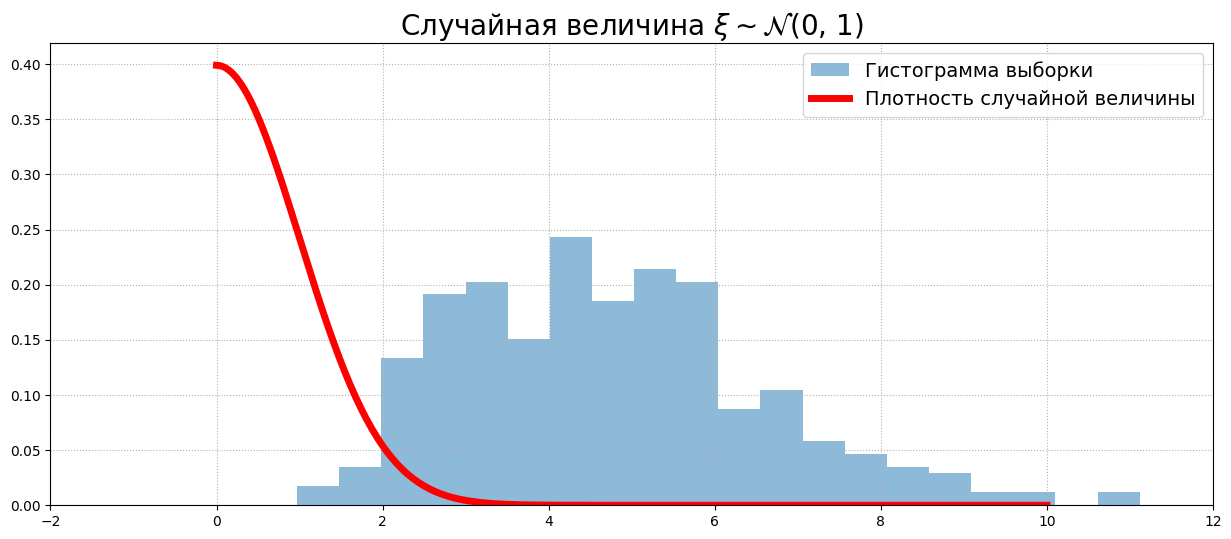

In [13]:
grid = np.linspace(0, 10,300)
plt.figure(figsize=(15, 6))
plt.hist(all_norm, bins=20, density=True, 
         alpha=0.5, label='Гистограмма выборки') 
plt.plot(grid, ss.norm.pdf(grid), color='red', 
         lw=5, label='Плотность случайной величины') 
plt.title(r'Случайная величина $\xi \sim \mathcal{N}$(0, 1)', fontsize=20)
plt.legend(fontsize=14, loc=1)
plt.xlim(-2, 12)
plt.grid(ls=':')
plt.show()

Сгенерируем выборку из любого распределения, отличного от нормального и построим гистограмму.  Сравним с нормальной плотностью.

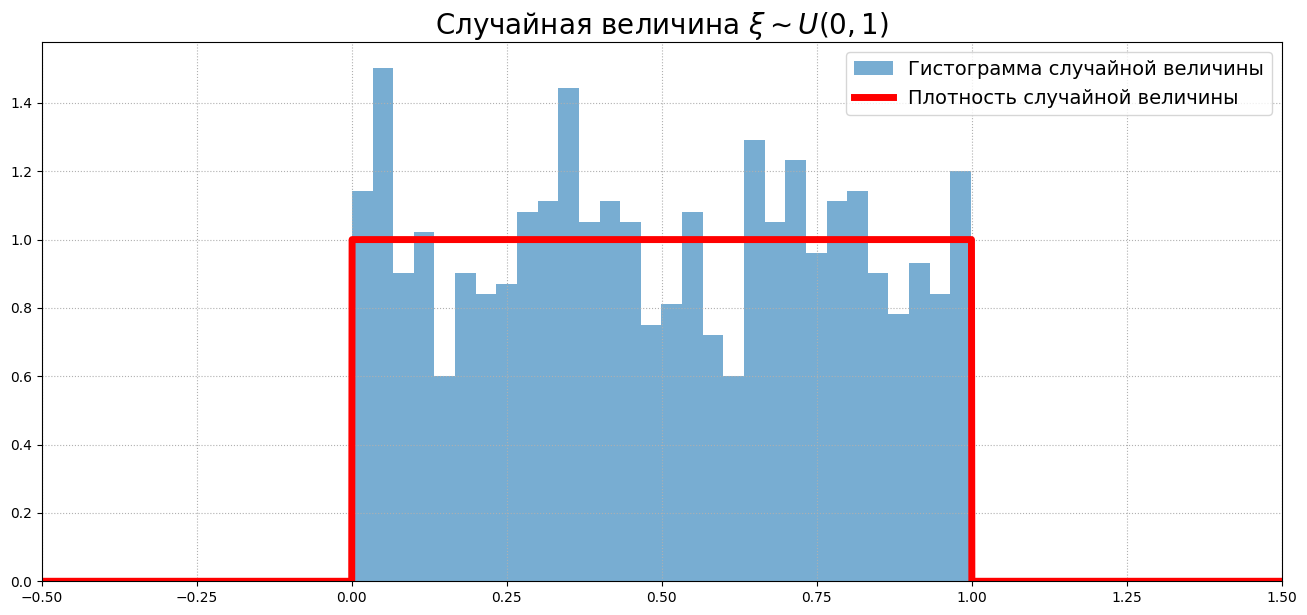

In [14]:
grid = np.linspace(-3, 3, 10001)  
sample = ss.uniform.rvs(size=1000)

plt.figure(figsize=(16, 7))
plt.hist(sample,  bins=30, density=True, alpha=0.6, 
         label='Гистограмма случайной величины') 
plt.plot(grid, ss.uniform.pdf(grid), color='red', lw=5, 
         label='Плотность случайной величины') 
plt.title(r'Случайная величина $\xi\sim U(0, 1)$', fontsize=20)
plt.xlim(-0.5, 1.5)
plt.legend(fontsize=14, loc=1)
plt.grid(ls=':')
plt.show()


5. Выберем параметры для нормального распределения.По 1000 раз смоделируем с ними выборки объема: N = 30, N = 1000. Посчитаем выборочные среднее и медиану для каждого объема выборки. Построим boxplot для каждого N (для выборок из медиан и средних).

<AxesSubplot: >

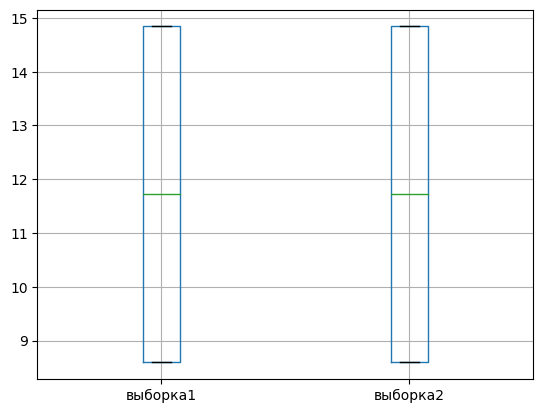

In [15]:
mas1=[]
mas2=[]
for i in range(1000):
    norm_1=ss.norm.rvs(loc=10, scale=5.0, size=30, random_state=SEED)
    norm_2=ss.norm.rvs(loc=15, scale=8.0, size=1000, random_state=SEED)
    mas1.append(np.mean(norm_1))
    mas1.append(np.median(norm_2))
    
    mas2.append(np.mean(norm_1))
    mas2.append(np.median(norm_2))
    
data_new=pd.DataFrame({'выборка1': mas1,'выборка2': mas2})
data_new.boxplot()
    
    
    

6   Выберем параметры для нормального распределения. 1000 раз:
1. Сгенерируем выборку размера N = 1000.
2. Сгенерируем выборку размера N = 10 из нормально распределенной генеральной совокупности.
3. Посчитаем для объединенной выборки выборочные среднее, медиану и усеченное среднее.Построем boxplot для распределений оценок.

<AxesSubplot: >

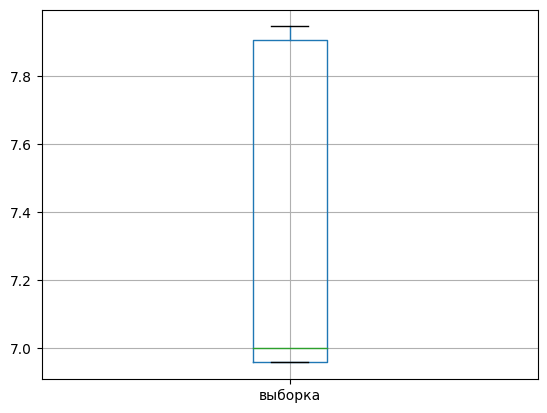

In [17]:
#7
norm_2 = ss.norm.rvs(loc=100, scale=3.0, size=1000, random_state=SEED)
norm_all1=[]

for i in range(1000):
    list1=ss.norm.rvs(loc=7, scale=3.0, size=1000, random_state=SEED)
    list2=np.random.choice(norm_2, size=10)
    all_list=np.array([*list1,*list2])
    norm_all1.append(np.mean(all_list))              #среднее
    norm_all1.append(np.median(all_list))            #медиана
    norm_all1.append(ss.trim_mean(all_list, 0.1))    #усеченное среднее
    
data_2=pd.DataFrame({'выборка': norm_all1})        #выборка из средних и медиан,усеченных средних.
data_2.boxplot()